<a href="https://colab.research.google.com/github/memeanji/python-bootcamp/blob/main/%EC%8B%A4%EC%8A%B55__%EA%B5%90%ED%86%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EC%A7%80%EB%A6%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **교통 데이터: 지리 데이터 시각화**

## **데이터 살펴보기**

[서울 열린데이터 광장](http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do)

In [ ]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/data/실습 05. 교통 데이터/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv', encoding = 'cp949')

In [4]:
data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202307,1호선,동대문,710,31,11581,2095,9027,6829,14177,...,8930,511,2412,0,216,0,0,0,0,20230803
1,202307,1호선,동묘앞,221,2,3012,1090,3682,5042,7336,...,4195,104,1649,0,272,0,0,0,0,20230803
2,202307,1호선,서울역,577,37,8434,9396,13088,51243,40143,...,13987,2297,2598,1,219,0,0,0,0,20230803
3,202307,1호선,시청,49,5,2381,4825,3784,22736,7558,...,4285,287,1085,0,12,0,0,0,0,20230803
4,202307,1호선,신설동,392,35,8967,2356,9520,8509,21822,...,9505,317,2244,0,0,0,0,0,0,20230803


- 서울시 지하철 승하차인원의 월별 합계

- 2018년 이후, 2호선만, 승차 인원만 분석 예정

## **질문 만들기**

- 승차 인원이 가장 많은 역은?
- 연도별로 혹은 월별로 승차 인원 추이에 차이가 있는가?
- 시간대별로 가장 승차인원이 많은 역은?
- 지하철역 시간대별 인원 유형 군집화
- 지도에 분석 결과를 시각화하기

## **데이터 전처리**

- 날짜 컬럼 추가

In [6]:
data['연도'] = pd.to_datetime(data['사용월'], format='%Y%m').dt.year
data['월'] = pd.to_datetime(data['사용월'], format='%Y%m').dt.month

data.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자,연도,월
0,202307,1호선,동대문,710,31,11581,2095,9027,6829,14177,...,2412,0,216,0,0,0,0,20230803,2023,7
1,202307,1호선,동묘앞,221,2,3012,1090,3682,5042,7336,...,1649,0,272,0,0,0,0,20230803,2023,7
2,202307,1호선,서울역,577,37,8434,9396,13088,51243,40143,...,2598,1,219,0,0,0,0,20230803,2023,7
3,202307,1호선,시청,49,5,2381,4825,3784,22736,7558,...,1085,0,12,0,0,0,0,20230803,2023,7
4,202307,1호선,신설동,392,35,8967,2356,9520,8509,21822,...,2244,0,0,0,0,0,0,20230803,2023,7


- 2018년 이후, 2호선만 필터링

In [7]:
data = data.query('호선명 == "2호선" and 연도 >= 2018')

- 지하철역명 통일

In [8]:
sorted(data['지하철역'].unique())

['강남',
 '강변(동서울터미널)',
 '건대입구',
 '교대(법원.검찰청)',
 '구로디지털단지',
 '구의(광진구청)',
 '낙성대',
 '낙성대(강감찬)',
 '당산',
 '대림(구로구청)',
 '도림천',
 '동대문역사문화공원',
 '동대문역사문화공원(DDP)',
 '뚝섬',
 '문래',
 '방배',
 '봉천',
 '사당',
 '삼성(무역센터)',
 '상왕십리',
 '서울대입구(관악구청)',
 '서초',
 '선릉',
 '성수',
 '시청',
 '신답',
 '신당',
 '신대방',
 '신도림',
 '신림',
 '신설동',
 '신정네거리',
 '신촌',
 '아현',
 '양천구청',
 '역삼',
 '영등포구청',
 '왕십리(성동구청)',
 '용답',
 '용두(동대문구청)',
 '을지로3가',
 '을지로4가',
 '을지로입구',
 '이대',
 '잠실(송파구청)',
 '잠실나루',
 '잠실새내',
 '종합운동장',
 '충정로(경기대입구)',
 '한양대',
 '합정',
 '홍대입구']

In [10]:
data['지하철역'].str.split('(')

,지하철역
10,[강남]
11,"[강변, 동서울터미널)]"
12,[건대입구]
13,"[교대, 법원.검찰청)]"
14,[구로디지털단지]
...,...
39852,[종합운동장]
39853,"[충정로, 경기대입구)]"
39854,[한양대]
39855,[합정]


In [11]:
data['지하철역'] = [i[0] for i in data['지하철역'].str.split('(')]
sorted(data['지하철역'].unique())

['강남',
 '강변',
 '건대입구',
 '교대',
 '구로디지털단지',
 '구의',
 '낙성대',
 '당산',
 '대림',
 '도림천',
 '동대문역사문화공원',
 '뚝섬',
 '문래',
 '방배',
 '봉천',
 '사당',
 '삼성',
 '상왕십리',
 '서울대입구',
 '서초',
 '선릉',
 '성수',
 '시청',
 '신답',
 '신당',
 '신대방',
 '신도림',
 '신림',
 '신설동',
 '신정네거리',
 '신촌',
 '아현',
 '양천구청',
 '역삼',
 '영등포구청',
 '왕십리',
 '용답',
 '용두',
 '을지로3가',
 '을지로4가',
 '을지로입구',
 '이대',
 '잠실',
 '잠실나루',
 '잠실새내',
 '종합운동장',
 '충정로',
 '한양대',
 '합정',
 '홍대입구']

- 승차 인원만 추출하기

In [14]:
#승차인원만 추출하기
data.columns

Index(['사용월', '연도', '월', '지하철역', '04시-05시 승차인원', '05시-06시 승차인원',
       '06시-07시 승차인원', '07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원',
       '10시-11시 승차인원', '11시-12시 승차인원', '12시-13시 승차인원', '13시-14시 승차인원',
       '14시-15시 승차인원', '15시-16시 승차인원', '16시-17시 승차인원', '17시-18시 승차인원',
       '18시-19시 승차인원', '19시-20시 승차인원', '20시-21시 승차인원', '21시-22시 승차인원',
       '22시-23시 승차인원', '23시-24시 승차인원', '00시-01시 승차인원', '01시-02시 승차인원',
       '02시-03시 승차인원', '03시-04시 승차인원'],
      dtype='object')

In [16]:
#이것을 리스트 컴프리헨션을 이용해서
[i for i in data.columns if '승차' in i]

['04시-05시 승차인원',
 '05시-06시 승차인원',
 '06시-07시 승차인원',
 '07시-08시 승차인원',
 '08시-09시 승차인원',
 '09시-10시 승차인원',
 '10시-11시 승차인원',
 '11시-12시 승차인원',
 '12시-13시 승차인원',
 '13시-14시 승차인원',
 '14시-15시 승차인원',
 '15시-16시 승차인원',
 '16시-17시 승차인원',
 '17시-18시 승차인원',
 '18시-19시 승차인원',
 '19시-20시 승차인원',
 '20시-21시 승차인원',
 '21시-22시 승차인원',
 '22시-23시 승차인원',
 '23시-24시 승차인원',
 '00시-01시 승차인원',
 '01시-02시 승차인원',
 '02시-03시 승차인원',
 '03시-04시 승차인원']

In [19]:
on_col = [i for i in data.columns if '승차' in i] # 승차가 들어간 col
data = data[['사용월','연도','월','지하철역']+on_col] # 전체 사용할 컬럼들만 들고오기

data.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
10,202307,2023,7,강남,120,9359,18503,40112,64256,52713,...,327480,215011,172551,196756,177694,80992,13773,3,0,0
11,202307,2023,7,강변,27,8936,28877,78164,117728,82763,...,61291,43557,32792,27539,19267,7874,1058,1,0,0
12,202307,2023,7,건대입구,290,16965,22074,53127,91248,61438,...,85337,64419,65838,72636,74202,45555,7559,3,0,0
13,202307,2023,7,교대,15,2693,11535,25250,36820,27461,...,133358,62654,51239,53658,42819,15754,3171,2,0,0
14,202307,2023,7,구로디지털단지,369,38505,53882,144838,184498,112257,...,210532,101581,65184,55202,41572,18845,3463,6,0,0


## **분석**

### [1] 승차 인원이 가장 많은 역은?

- 합계 컬럼 만들기

In [21]:
data[on_col].sum(axis=1) # 이렇게하면 행의 합계가 구해짐
#이걸 합계라는 컬럼에 넣어준거임

,0
10,2408376
11,933338
12,1060476
13,852909
14,1629379
...,...
39852,332340
39853,344169
39854,246216
39855,1001181


In [22]:
data['합계'] = data[on_col].sum(axis=1)

data.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,합계
10,202307,2023,7,강남,120,9359,18503,40112,64256,52713,...,215011,172551,196756,177694,80992,13773,3,0,0,2408376
11,202307,2023,7,강변,27,8936,28877,78164,117728,82763,...,43557,32792,27539,19267,7874,1058,1,0,0,933338
12,202307,2023,7,건대입구,290,16965,22074,53127,91248,61438,...,64419,65838,72636,74202,45555,7559,3,0,0,1060476
13,202307,2023,7,교대,15,2693,11535,25250,36820,27461,...,62654,51239,53658,42819,15754,3171,2,0,0,852909
14,202307,2023,7,구로디지털단지,369,38505,53882,144838,184498,112257,...,101581,65184,55202,41572,18845,3463,6,0,0,1629379


- 지하철역별 월평균 승차 인원 구하기

In [23]:
data.groupby('지하철역')[['합계']].mean() # 월평균이 나오는거
#지수형태지만 시각화하면 숫자로 나올거임

,합계
지하철역,
강남,2.475218e+06
강변,1.051275e+06
건대입구,1.101436e+06
교대,9.273203e+05
구로디지털단지,1.656332e+06
구의,6.574240e+05
낙성대,7.973586e+05
당산,5.469038e+05
대림,7.384466e+05


✅ reset_index()의 역할
: 인덱스를 기본 숫자 인덱스로 초기화해 줌
→ 기존의 인덱스를 제거하고 0, 1, 2, 3...처럼 다시 만듦.

- 원래 인덱스를 열로 보존할 수도 있음

- 예: df.reset_index()는 기존 인덱스를 새로운 열로 추가함.

- df.reset_index(drop=True)를 쓰면 기존 인덱스를 완전히 버리고 숫자 인덱스만 남김.

In [24]:
data.groupby('지하철역')[['합계']].mean().reset_index()

,지하철역,합계
0,강남,2.475218e+06
1,강변,1.051275e+06
2,건대입구,1.101436e+06
3,교대,9.273203e+05
4,구로디지털단지,1.656332e+06
5,구의,6.574240e+05
6,낙성대,7.973586e+05
7,당산,5.469038e+05
8,대림,7.384466e+05
9,도림천,3.452230e+04


In [25]:
data_mean = data.groupby('지하철역')[['합계']].mean().reset_index().rename({'합계':'월평균'}, axis=1).sort_values('월평균', ascending=False)
#월평균을 내림차순으로 정렬
data_mean

,지하철역,월평균
0,강남,2.475218e+06
42,잠실,2.185502e+06
49,홍대입구,1.895644e+06
27,신림,1.815902e+06
4,구로디지털단지,1.656332e+06
16,삼성,1.496685e+06
26,신도림,1.481450e+06
20,선릉,1.463946e+06
18,서울대입구,1.390678e+06
33,역삼,1.286969e+06


In [26]:
fig = px.bar(data_frame = data_mean, x='지하철역', y='월평균', title='지하철역별 월평균 승차인원')
fig.show()

### [2] 연도별로 혹은 월별로 승차 인원 추이에 차이가 있는가?

In [27]:
data.head()

,사용월,연도,월,지하철역,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,...,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원,합계
10,202307,2023,7,강남,120,9359,18503,40112,64256,52713,...,215011,172551,196756,177694,80992,13773,3,0,0,2408376
11,202307,2023,7,강변,27,8936,28877,78164,117728,82763,...,43557,32792,27539,19267,7874,1058,1,0,0,933338
12,202307,2023,7,건대입구,290,16965,22074,53127,91248,61438,...,64419,65838,72636,74202,45555,7559,3,0,0,1060476
13,202307,2023,7,교대,15,2693,11535,25250,36820,27461,...,62654,51239,53658,42819,15754,3171,2,0,0,852909
14,202307,2023,7,구로디지털단지,369,38505,53882,144838,184498,112257,...,101581,65184,55202,41572,18845,3463,6,0,0,1629379


In [30]:
data.query('연도 <= 2022').groupby(['연도'])[['합계']].sum().reset_index()
#연도별로 합계가 나옴

,연도,합계
0,2018,556124147
1,2019,559488134
2,2020,397139151
3,2021,391591285
4,2022,441861856


In [28]:
year_sum = data.query('연도 <= 2022').groupby(['연도'])[['합계']].sum().reset_index()
year_sum['연도'] = year_sum['연도'].astype(str)

fig = px.line(data_frame=year_sum, x='연도', y='합계')
fig.show()
#코로나가 시작되면서 승차인원이 많이 줄어들었음

In [31]:
month_sum = data.query('연도 <= 2022').groupby(['월'])[['합계']].sum().reset_index()
month_sum['월'] = month_sum['월'].astype(str)

fig = px.line(data_frame=month_sum, x='월', y='합계')
fig.show()
#월별 합계 시각화
# 연말에 승차인원이 많음
# 2월과 9월에 승차인원이 줄어듬 아마도 추석과 설때문이지 않나 싶음
#글고 2월은 일수가 적기 때문

### [3] 시간대별로 가장 승차인원이 많은 역은?

In [34]:
data_mean.head(10)['지하철역']

,지하철역
0,강남
42,잠실
49,홍대입구
27,신림
4,구로디지털단지
16,삼성
26,신도림
20,선릉
18,서울대입구
33,역삼


In [32]:
top10 = data_mean.sort_values('월평균', ascending=False).head(10)['지하철역']
top10

,지하철역
0,강남
42,잠실
49,홍대입구
27,신림
4,구로디지털단지
16,삼성
26,신도림
20,선릉
18,서울대입구
33,역삼


In [37]:
data.query('지하철역 in @top10').groupby('지하철역')[on_col].mean() #시각화의 편읠르 위해 앞에ㅔ 3개열 문자열까지만 컬럼으로 남겨놓을게


,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,199.761194,11267.805970,20091.656716,40044.029851,64827.731343,54185.761194,54050.656716,72620.477612,92869.746269,115656.552239,...,343752.835821,223735.164179,178879.910448,216217.447761,207535.313433,83942.656716,12218.492537,41.925373,10.014925,0.626866
구로디지털단지,251.492537,39288.597015,52406.089552,137133.253731,182999.328358,115665.313433,68659.567164,61427.626866,66485.970149,68082.552239,...,223309.611940,115340.179104,69854.582090,60133.388060,46033.656716,19676.313433,2521.895522,11.776119,1.343284,0.119403
삼성,165.776119,4758.522388,7508.895522,15993.925373,21927.223881,22378.268657,24176.477612,35510.402985,45498.417910,60130.477612,...,294941.119403,168624.970149,123201.343284,105947.029851,71970.358209,19138.029851,2394.388060,59.761194,29.626866,0.552239
서울대입구,4147.731343,28407.373134,42981.582090,125993.507463,180685.805970,119475.805970,68434.402985,61263.716418,66588.074627,71341.164179,...,95358.582090,59846.805970,50127.925373,52080.597015,46056.686567,21462.447761,2779.701493,10.223881,2.283582,0.208955
선릉,102.313433,4914.492537,11078.328358,21083.328358,32790.985075,31822.820896,34649.179104,45507.268657,53924.343284,63801.223881,...,283547.059701,143360.208955,89939.089552,91230.776119,73719.223881,25119.850746,3186.000000,10.343284,2.298507,0.179104
신도림,3361.597015,35786.268657,50420.179104,134114.179104,140965.089552,89916.074627,61494.925373,60289.582090,68699.716418,72645.552239,...,134345.716418,81201.895522,68743.791045,70103.014925,52677.746269,21723.238806,2043.597015,15.716418,1.597015,0.119403
신림,284.044776,39889.641791,75300.283582,204526.492537,305087.701493,182738.835821,98890.149254,82922.119403,87595.701493,84726.820896,...,93013.238806,63213.104478,52872.417910,51414.462687,45214.208955,22744.761194,3191.626866,18.194030,2.238806,0.268657
역삼,44.149254,3807.164179,8615.835821,14899.805970,25531.537313,23781.820896,24348.492537,32903.552239,40367.059701,49070.597015,...,274455.746269,141883.850746,83333.000000,84076.910448,58585.552239,21395.791045,2791.358209,5.835821,1.208955,0.104478
잠실,92.358209,12148.671642,46134.417910,115525.567164,166209.074627,120828.656716,81041.298507,81278.716418,90041.104478,100344.522388,...,231972.447761,159950.358209,157380.462687,137989.805970,100085.656716,30282.104478,3182.029851,24.805970,2.179104,0.104478


In [39]:
#주요 역 10개만 필터링하여 시간당 월평균 인원수 구하기
top10 = data_mean.sort_values('월평균', ascending=False).head(10)['지하철역']
top10_mean_hour = data.query('지하철역 in @top10').groupby('지하철역')[on_col].mean()
top10_mean_hour.columns = [i[:3] for i in top10_mean_hour.columns]

In [40]:
#전체 기준 히트맵
#plotly를 사용하지않고 판다스에서 바로 백그라운드를 바꿔서 사용하는 방법
top10_mean_hour.style.background_gradient(cmap='pink_r', axis=None).format('{:.0f}')
#axis=None으로 하면 전체를 기준으로 만들어줌
#강남 - 홍입까지 새벽 4시부터 12시까지 보여줌
# 8시에 승차인원이 가장 많음

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,200,11268,20092,40044,64828,54186,54051,72620,92870,115657,122541,149213,170881,240434,343753,223735,178880,216217,207535,83943,12218,42,10,1
구로디지털단지,251,39289,52406,137133,182999,115665,68660,61428,66486,68083,61964,64823,77632,122631,223310,115340,69855,60133,46034,19676,2522,12,1,0
삼성,166,4759,7509,15994,21927,22378,24176,35510,45498,60130,74138,94213,115663,188316,294941,168625,123201,105947,71970,19138,2394,60,30,1
서울대입구,4148,28407,42982,125994,180686,119476,68434,61264,66588,71341,64633,68216,75435,85348,95359,59847,50128,52081,46057,21462,2780,10,2,0
선릉,102,4914,11078,21083,32791,31823,34649,45507,53924,63801,72065,90514,121775,169803,283547,143360,89939,91231,73719,25120,3186,10,2,0
신도림,3362,35786,50420,134114,140965,89916,61495,60290,68700,72646,72069,75747,83664,101420,134346,81202,68744,70103,52678,21723,2044,16,2,0
신림,284,39890,75300,204526,305088,182739,98890,82922,87596,84727,76579,75055,81788,88834,93013,63213,52872,51414,45214,22745,3192,18,2,0
역삼,44,3807,8616,14900,25532,23782,24348,32904,40367,49071,56615,73720,92117,174617,274456,141884,83333,84077,58586,21396,2791,6,1,0
잠실,92,12149,46134,115526,166209,120829,81041,81279,90041,100345,105703,121147,142022,182116,231972,159950,157380,137990,100086,30282,3182,25,2,0


In [41]:
#행 기준 히트맵 , , axis=1
top10_mean_hour.style.background_gradient(cmap='pink_r', axis=1).format('{:.0f}')
#강남,역삼 저녁시간
#구디,강남 아침시간
#홍입, 서울대입구은 아침시간에 더 많음

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
지하철역,,,,,,,,,,,,,,,,,,,,,,,,
강남,200,11268,20092,40044,64828,54186,54051,72620,92870,115657,122541,149213,170881,240434,343753,223735,178880,216217,207535,83943,12218,42,10,1
구로디지털단지,251,39289,52406,137133,182999,115665,68660,61428,66486,68083,61964,64823,77632,122631,223310,115340,69855,60133,46034,19676,2522,12,1,0
삼성,166,4759,7509,15994,21927,22378,24176,35510,45498,60130,74138,94213,115663,188316,294941,168625,123201,105947,71970,19138,2394,60,30,1
서울대입구,4148,28407,42982,125994,180686,119476,68434,61264,66588,71341,64633,68216,75435,85348,95359,59847,50128,52081,46057,21462,2780,10,2,0
선릉,102,4914,11078,21083,32791,31823,34649,45507,53924,63801,72065,90514,121775,169803,283547,143360,89939,91231,73719,25120,3186,10,2,0
신도림,3362,35786,50420,134114,140965,89916,61495,60290,68700,72646,72069,75747,83664,101420,134346,81202,68744,70103,52678,21723,2044,16,2,0
신림,284,39890,75300,204526,305088,182739,98890,82922,87596,84727,76579,75055,81788,88834,93013,63213,52872,51414,45214,22745,3192,18,2,0
역삼,44,3807,8616,14900,25532,23782,24348,32904,40367,49071,56615,73720,92117,174617,274456,141884,83333,84077,58586,21396,2791,6,1,0
잠실,92,12149,46134,115526,166209,120829,81041,81279,90041,100345,105703,121147,142022,182116,231972,159950,157380,137990,100086,30282,3182,25,2,0


### [4] 지하철역 시간대별 인원 유형 군집화

- 승차 인원으로 유형 군집화

In [44]:
#군집화를 할건데 Kmeans 알고리즘을 사용해서 할거임
data.groupby('지하철역')[on_col].mean()


,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,199.761194,11267.805970,20091.656716,40044.029851,64827.731343,54185.761194,54050.656716,72620.477612,92869.746269,115656.552239,...,343752.835821,223735.164179,178879.910448,216217.447761,207535.313433,83942.656716,12218.492537,41.925373,10.014925,0.626866
구로디지털단지,251.492537,39288.597015,52406.089552,137133.253731,182999.328358,115665.313433,68659.567164,61427.626866,66485.970149,68082.552239,...,223309.611940,115340.179104,69854.582090,60133.388060,46033.656716,19676.313433,2521.895522,11.776119,1.343284,0.119403
삼성,165.776119,4758.522388,7508.895522,15993.925373,21927.223881,22378.268657,24176.477612,35510.402985,45498.417910,60130.477612,...,294941.119403,168624.970149,123201.343284,105947.029851,71970.358209,19138.029851,2394.388060,59.761194,29.626866,0.552239
서울대입구,4147.731343,28407.373134,42981.582090,125993.507463,180685.805970,119475.805970,68434.402985,61263.716418,66588.074627,71341.164179,...,95358.582090,59846.805970,50127.925373,52080.597015,46056.686567,21462.447761,2779.701493,10.223881,2.283582,0.208955
선릉,102.313433,4914.492537,11078.328358,21083.328358,32790.985075,31822.820896,34649.179104,45507.268657,53924.343284,63801.223881,...,283547.059701,143360.208955,89939.089552,91230.776119,73719.223881,25119.850746,3186.000000,10.343284,2.298507,0.179104
신도림,3361.597015,35786.268657,50420.179104,134114.179104,140965.089552,89916.074627,61494.925373,60289.582090,68699.716418,72645.552239,...,134345.716418,81201.895522,68743.791045,70103.014925,52677.746269,21723.238806,2043.597015,15.716418,1.597015,0.119403
신림,284.044776,39889.641791,75300.283582,204526.492537,305087.701493,182738.835821,98890.149254,82922.119403,87595.701493,84726.820896,...,93013.238806,63213.104478,52872.417910,51414.462687,45214.208955,22744.761194,3191.626866,18.194030,2.238806,0.268657
역삼,44.149254,3807.164179,8615.835821,14899.805970,25531.537313,23781.820896,24348.492537,32903.552239,40367.059701,49070.597015,...,274455.746269,141883.850746,83333.000000,84076.910448,58585.552239,21395.791045,2791.358209,5.835821,1.208955,0.104478
잠실,92.358209,12148.671642,46134.417910,115525.567164,166209.074627,120828.656716,81041.298507,81278.716418,90041.104478,100344.522388,...,231972.447761,159950.358209,157380.462687,137989.805970,100085.656716,30282.104478,3182.029851,24.805970,2.179104,0.104478


In [45]:
hour_mean = data.groupby('지하철역')[on_col].mean()
hour_mean.columns = [i[:3] for i in hour_mean.columns]
hour_mean_pct = hour_mean.div(hour_mean.sum(axis=1), axis=0)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

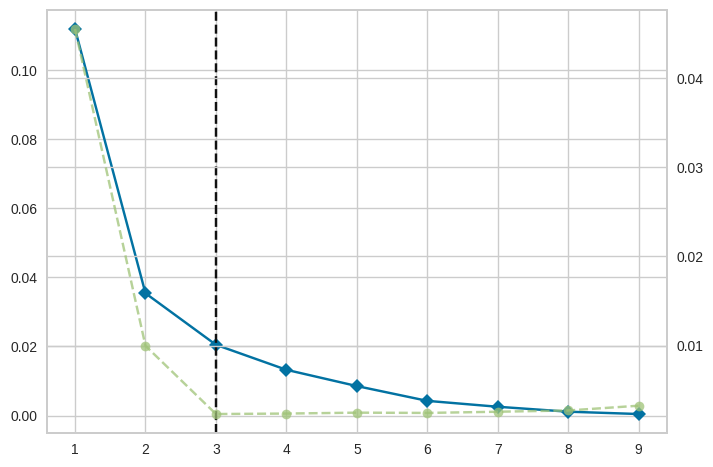

In [46]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#kmeans 알고리즘을 사용할떄 적합한 K를 정하는 방법 그래서 3개로 정하는게 가장 적합하다
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(hour_mean_pct)

In [48]:
k = 3
model = KMeans(n_clusters = k, random_state = 10) #KMeans 모델을 정의
model.fit(hour_mean_pct) #학습
hour_mean_pct['cluster'] = model.fit_predict(hour_mean_pct).astype(str) #클러스터 열 만들기

In [50]:
hour_mean_pct

,04시,05시,06시,07시,08시,09시,10시,11시,12시,13시,...,19시,20시,21시,22시,23시,00시,01시,02시,03시,cluster
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,0.000081,0.004552,0.008117,0.016178,0.026191,0.021891,0.021837,0.029339,0.037520,0.046726,...,0.090390,0.072268,0.087353,0.083845,0.033913,0.004936,0.000017,4.046079e-06,2.532568e-07,0
구로디지털단지,0.000152,0.023720,0.031640,0.082793,0.110485,0.069832,0.041453,0.037087,0.040140,0.041104,...,0.069636,0.042174,0.036305,0.027793,0.011879,0.001523,0.000007,8.109990e-07,7.208880e-08,1
삼성,0.000111,0.003179,0.005017,0.010686,0.014651,0.014952,0.016153,0.023726,0.030399,0.040176,...,0.112666,0.082316,0.070788,0.048087,0.012787,0.001600,0.000040,1.979499e-05,3.689746e-07,0
서울대입구,0.002983,0.020427,0.030907,0.090599,0.129926,0.085912,0.049209,0.044053,0.047882,0.051300,...,0.043034,0.036046,0.037450,0.033118,0.015433,0.001999,0.000007,1.642064e-06,1.502542e-07,2
선릉,0.000070,0.003357,0.007567,0.014402,0.022399,0.021738,0.023668,0.031085,0.036835,0.043582,...,0.097927,0.061436,0.062318,0.050357,0.017159,0.002176,0.000007,1.570076e-06,1.223436e-07,0
신도림,0.002269,0.024156,0.034034,0.090529,0.095153,0.060695,0.041510,0.040696,0.046373,0.049037,...,0.054812,0.046403,0.047321,0.035558,0.014663,0.001379,0.000011,1.078008e-06,8.059873e-08,1
신림,0.000156,0.021967,0.041467,0.112631,0.168009,0.100633,0.054458,0.045664,0.048238,0.046658,...,0.034811,0.029116,0.028313,0.024899,0.012525,0.001758,0.000010,1.232889e-06,1.479467e-07,2
역삼,0.000034,0.002958,0.006695,0.011577,0.019839,0.018479,0.018919,0.025567,0.031366,0.038129,...,0.110247,0.064751,0.065329,0.045522,0.016625,0.002169,0.000005,9.393819e-07,8.118115e-08,0
잠실,0.000042,0.005559,0.021109,0.052860,0.076051,0.055286,0.037081,0.037190,0.041199,0.045914,...,0.073187,0.072011,0.063139,0.045795,0.013856,0.001456,0.000011,9.970728e-07,4.780486e-08,1


In [49]:
fig = px.scatter(data_frame = hour_mean_pct[['08시','18시','cluster']].reset_index(), x='08시', y='18시', color='cluster', width=700, height=600, title='시간대별 승차 인원 비중 군집화', hover_name='지하철역')
fig.show()

In [51]:
for i in range(k):
    print(f'cluster {i}')
    print(list(hour_mean_pct.query(f'cluster == "{i}"').index))

cluster 0
['강남', '삼성', '선릉', '역삼']
cluster 1
['구로디지털단지', '신도림', '잠실', '홍대입구']
cluster 2
['서울대입구', '신림']


### [5] 지도에 분석 결과를 시각화

-  8시 승차 인원과 18시 승차 인원을 지도에 시각화 해보자

- 지하철역별 위도 경도 데이터 전처리

In [53]:
coordinate = pd.read_csv('/content/drive/MyDrive/data/실습 05. 교통 데이터/서울시 역사마스터 정보.csv', encoding='cp949')
coordinate.head()

,역사_ID,역사명,호선,위도,경도
0,9996,미사,5호선,37.560927,127.193877
1,9995,강일,5호선,37.557490,127.175930
2,4929,김포공항,김포골드라인,37.562360,126.801868
3,4928,고촌,김포골드라인,37.601243,126.770345
4,4927,풍무,김포골드라인,37.612488,126.732387


In [54]:
coordinate = coordinate.query('호선 == "2호선"')
coordinate['역사명'] = [i[0] for i in coordinate['역사명'].str.split('(')]
coordinate.rename({'역사명':'지하철역'}, axis=1, inplace=True)
coordinate

,역사_ID,지하철역,호선,위도,경도
708,250,용두,2호선,37.574028,127.038091
709,249,신정네거리,2호선,37.520074,126.852912
710,248,양천구청,2호선,37.512398,126.865819
711,247,도림천,2호선,37.514287,126.882768
712,246,신설동,2호선,37.574747,127.024932
713,245,신답,2호선,37.570040,127.046481
714,244,용답,2호선,37.561904,127.050899
715,243,충정로,2호선,37.559704,126.964378
716,242,아현,2호선,37.557345,126.956141
717,241,이대,2호선,37.556733,126.946013


In [55]:
hour_mean_merge = hour_mean.reset_index()[['지하철역','08시','18시']]
coordinate_merge = coordinate[['지하철역','위도','경도']]
hour_mean_coor = pd.merge(hour_mean_merge, coordinate_merge, on='지하철역')

In [65]:
hour_mean_coor['cluster'] = model.fit_predict(hour_mean_pct).astype(str)
hour_mean_coor.head()
#지하철역별 8시 저녁 6시, 위도 경도 cluster가 보임

,지하철역,08시,18시,위도,경도,cluster
0,강남,64827.731343,343752.835821,37.497990,127.027912,0
1,구로디지털단지,182999.328358,223309.611940,37.485266,126.901401,1
2,삼성,21927.223881,294941.119403,37.508844,127.063160,0
3,서울대입구,180685.805970,95358.582090,37.481247,126.952739,2
4,선릉,32790.985075,283547.059701,37.504286,127.048203,0


- 지도에 시각화

In [56]:
import folium
from folium import plugins

In [59]:
center = [37.541, 126.986] #서울 중간

m = folium.Map(location=center, zoom_start=12)
m

In [63]:
center = [37.541, 126.986] #서울 중간

m = folium.Map(location=center, zoom_start=12)
m.add_child(plugins.HeatMap(zip(hour_mean_coor['위도'], hour_mean_coor['경도'], hour_mean_coor['08시'])))

m

#신림, 서울대 입구에서 가장 많이 승차하는 걸 볼 수 있음

In [62]:
m = folium.Map(location=center, zoom_start=12)
m.add_child(plugins.HeatMap(zip(hour_mean_coor['위도'], hour_mean_coor['경도'], hour_mean_coor['18시'])))
m

- 승차 인원 유형을 지도에 시각화

In [67]:
m = folium.Map(location=center, zoom_start=12)

for idx in hour_mean_coor.index:
    lat = hour_mean_coor.loc[idx, '위도']
    long = hour_mean_coor.loc[idx, '경도']
    title = hour_mean_coor.loc[idx, '지하철역']

    if hour_mean_coor.loc[idx, 'cluster'] == "0":
        color = '#000000'
    elif hour_mean_coor.loc[idx, 'cluster'] == "1":
        color = '#3A01DF'
    else:
        color = '#DF0101'

    folium.CircleMarker([lat, long]
                        , radius=18
                        , color = color
                        , fill = color
                        , tooltip = title).add_to(m)
m

#빨간색 circle은 저녁시간대 승차인원이 많았던곳 : 주로 서울 동쪽
# 파란색 circle은 아침시간대 많은 곳 ㅅ
#검정색 아침과 저녁의 싱차인원이 비교적 비슷한 곳

## **정리**

[1] 승하차 인원이 가장 많은 역은?
- 강남, 잠실, 홍대입구, 신림, 구로디지털단지...

[2] 연도별로 혹은 월별로 승차 인원 추이에 차이가 있는가?
- 코로나가 시작된 2020년, 2021년에 인원이 많이 줄었고 2022년도부터 다시 회복 중

[3] 시간대별로 가장 승차인원이 많은 역은?
- 아침에 비교적 승차 인원이 많은 역과 저녁에 비교적 승차 인원이 많은 역이 있음을 히트맵으로 파악

[4] 지하철역 시간대별 인원 유형 군집화

    cluster 0: 아침과 저녁 승차인원 비율이 비교적 비슷
    ['건대입구', '구로디지털단지', '당산', '도림천', '문래', '방배', '사당', '신당', '신도림', '신설동', '신촌', '영등포구청', '왕십리', '이대', '잠실', '종합운동장', '충정로', '합정', '홍대입구']
    cluster 1: 저녁 승차인원 비율이 높음
    ['강남', '교대', '동대문역사문화공원', '뚝섬', '삼성', '서초', '선릉', '성수', '시청', '역삼', '을지로3가', '을지로4가', '을지로입구', '한양대']
    cluster 2: 아침 승차인원 비율이 높음
    ['강변', '구의', '낙성대', '대림', '봉천', '상왕십리', '서울대입구', '신답', '신대방', '신림', '신정네거리', '아현', '양천구청', '용답', '용두', '잠실나루', '잠실새내']

[5] 지도에 분석 결과를 시각화
- cluster 0: 주거와 상업 시설, 회사가 비슷하게 분포한 지역
- cluster 1: 회사가 많이 분포한 지역
- cluster 2: 주거 지역이 많이 분포한 지역